# Exploratory Analysis: World Happiness Report 2019

Data: [World Happiness Report (Kaggle)](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv)

In this notebook, we perform exploratory analysis on the World Happiness Index data and try to find how specific features are related to each other.
> Exploratory Data Analysis is the process of performing initial investigations on data so as to discover patterns, spot anomalies, check assumptions, etc. with the help of summary statistics and graphical representations.

We use basic Python libraries: pandas to read and access the data, numpy to perform mathematical operations, and seaborn/matplotlib for visualization.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
df.shape # data provides info (for 9 features) about 156 countries

(156, 9)

Let's say we think that the **happiness is influenced the most by per capita GDP**.
To test this, instead of jumping straight to linear regression, we can first find out if the two values are correlated.

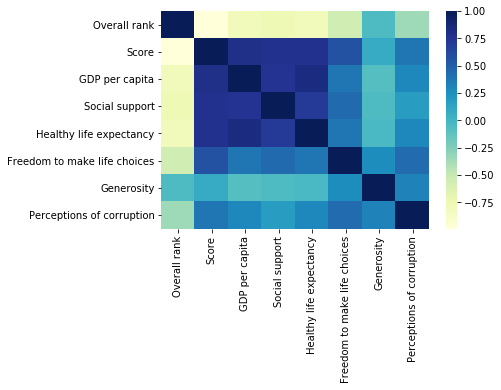

In [5]:
correlations = df.corr()
sns.heatmap(correlations, annot = False, cmap="YlGnBu") # set annot to True to see correlation values

It looks like the score correlates well not only with the GDP but also social support and life expectancy. Many other correlations (such as that between life expectancy and GDP) are also apparent. 

----
## Linear Regression
Linear regression is a method to quantify a linear relationship between an input/independent variable $x$ and an output/dependent variable $y$. In our case, we claim that the **per capita GDP is proportional to the happiness score**.
Now, the relationship between the two may not be perfect and to account for that, we introduce a noise/error variable $\epsilon$. This can be mathematically represented as:

$$y_{n}= \theta x_{n}+\epsilon_{n}$$

The slope parameter $\theta$ is unknown (for now).

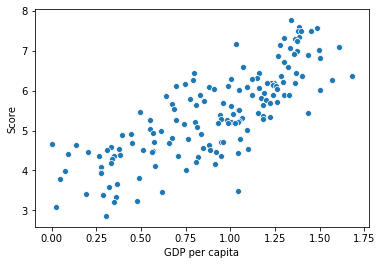

In [6]:
sns.scatterplot(x = 'GDP per capita', y = 'Score', data = df)

In [29]:
from sklearn.linear_model import LinearRegression
x = np.array(df['GDP per capita']).reshape((-1, 1)) # reshape x to a 156, 1 matrix
y = np.array(df['Score']) # do not need to reshape y; y.shape = 1, 156

In [8]:
model = LinearRegression() # create an instance of the linear regression class. This model does not do anything yet
model.fit(x, y)
print('slope:', model.coef_)
print('Intercept', model.intercept_)

slope: [2.218148]
Intercept 3.3993451782924162


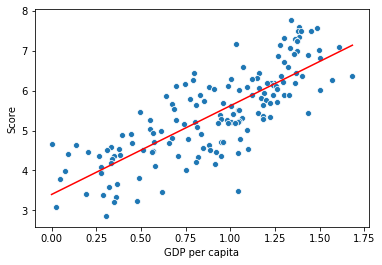

In [9]:
y_pred = model.predict(x)
# lets see what our line looks like
sns.scatterplot(x = 'GDP per capita', y = 'Score', data = df)
sns.lineplot(df['GDP per capita'], y_pred, color='red')

Instead of using a predefined model class, we can also use the **Least Squares Optimization Method** to find $\theta$.  To do that, we use the **Mean Squared Error (MSE)** as our objective function. That means that we compute the value of theta that will minimize the MSE.

\begin{align}
\min _{\theta} \frac{1}{N}\sum_{n=1}^{N}\left(y_{n}-\theta x_{n}\right)^{2}
\end{align}

The MSE minima can be calculated by solving the normal equation (see [this PDF](https://www.cns.nyu.edu/~eero/NOTES/leastSquares.pdf) for a more comprehensive review).

\begin{align}
\hat\theta = \frac{\vec{x}^\top \vec{y}}{\vec{x}^\top \vec{x}}
\end{align}

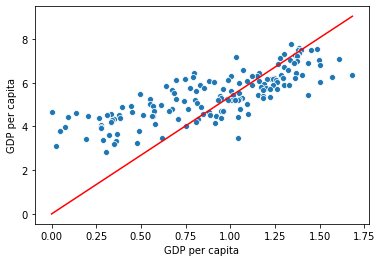

In [47]:
# x = df['GDP per capita']
theta_hat = (x.T @ y) / (x.T @ x) # analytical computation of theta
y_hat = theta_hat * x # y predicted by theta_hat

sns.scatterplot(x = 'GDP per capita', y = 'Score', data = df)
sns.lineplot(df['GDP per capita'], y_hat, color='red')

# predefined class works better; this method didn't account for an intercept, hence the poorfit

## Maximum Likelihood Estimation